# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source of dataset 
UCI Machine Learning Repository [click here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 


[Download dataset](https://drive.google.com/file/d/1uUOmUjoOgrJAooZUUzr4kR6zqiV0cmHw/view?usp=sharing()

# 1. Import Dataset



In [1]:
#import package
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vanindraa/vanindrarepo/Dataset/CSV%20House%20Price%20Prediction.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# cek jumlah row dan column
df.shape

(414, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Dataset real estate valuation mempunya 414 baris dan 7 kolom diluar kolom no

In [5]:
#drop column no
df.drop(columns='No',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
df.shape

(414, 7)

#### Profiling Descriptive Stats

In [7]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Harga rumah menyebar dari 7,6 sampai 117 ping. Rata=rata harga rumah berada pada 37,9 ping. Sebarannya juga hampir mormaljika dilihat dari nilai mean dan median yang hampir sama.

#### Simplify the colums label for a better processing

In [8]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [10]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

**2.1. Gambarkan keadaan dari harga rumah pada variable (house price of unit area/Y)!**

**a. Gambaran dapat dijelaskan melalui statistik deskriptif dari variable harga rumah tersebut.**

In [12]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Key takeaway: Harga rumah menyebar dari 7,6 sampai 117 ping. Rata=rata harga rumah berada pada 37,9 ping. Sebarannya juga hampir mormaljika dilihat dari nilai mean dan median yang hampir sama.

**b. Bagaimana sebaran harga rumah tersebut?**

Hint: Dapat dicek menggunakan statistical plot, kemudian apa key take away yang bisa
diambil? Coba uraikan!

In [13]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

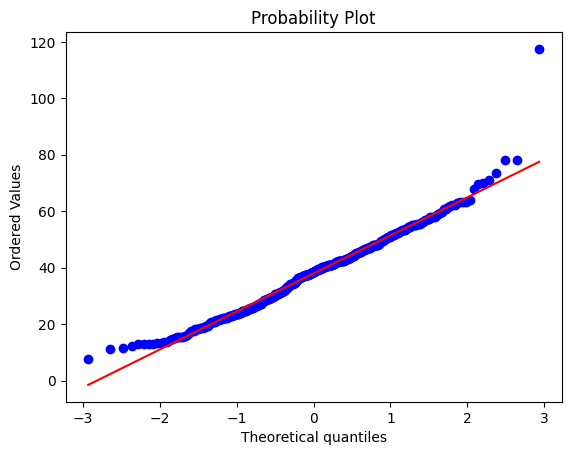

In [14]:
#QQ-Plot
stats.probplot(df['Y'], dist='norm',plot=py)
py.show()

Key takeaway: Didasarkan QQplot, dapat diketahui bahwa titik2 data menempel/mendekati garis diagonal. Menunjukkan bahwa data harga unit rumah menyebar secara normal. maka model harga unit rumah bisa diprediksi dengan regresi karena memenuhi salah satu asumsi regresi yaitu normalitas.

**c. Apakah ada nilai outlier pada variabel harga rumah? Jika ada, nilai berapa saja?**


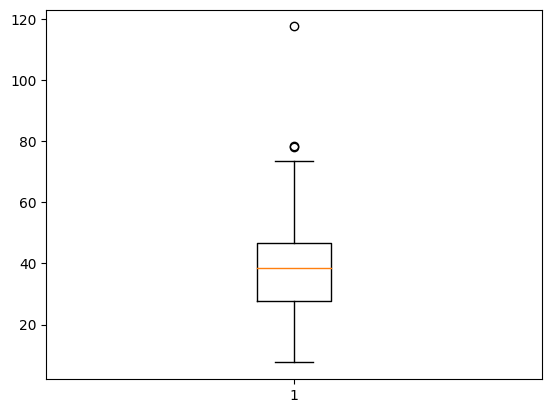

In [15]:
plt.boxplot(df['Y'])
plt.show()

In [16]:
df.loc[df['Y']>74.95]

,X1,X2,X3,X4,X5,X6,Y
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [17]:
df['Y'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Key takeaway: Terdapat outlier disini, di antara nilai 75 sampai 120.

In [18]:
#Find Q1 & Q3
Q1 = np.percentile(df.Y,25)
Q3 = np.percentile(df.Y,75)
IQR = (Q3-Q1)
print("IQR sama dengan", IQR)

IQR sama dengan 18.900000000000002


In [19]:
# Find the IQR which is the difference between third and first quartile
IQR


18.900000000000002

In [20]:
# Find lower and upper bound
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)


Lower Bound = -0.6500000000000021
Upper Bound = 74.95


In [21]:
# Find outliers
df.loc[df['Y']>74.95]

,X1,X2,X3,X4,X5,X6,Y
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [22]:
df.loc[df['Y']<Lbound]

,X1,X2,X3,X4,X5,X6,Y


In [23]:
#dropping outliers
filt = df['Y']>Ubound
df = df.drop(index=df[filt].index).reset_index()
df.drop(columns='index',inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [67]:
df.loc[df['Y']>Ubound]

,X1,X2,X3,X4,X5,X6,Y


Key takeaway: Terdapat tiga outliers dalam data ini, data index 220,280, dan 312 dengan value 78.3,117.5, dan 78

**d. Variabel apa saja yang berkorelasi dengan harga rumah? Bagaimana arah dan seberapa
erat hubungannya?**

**Note : Jika koef korelasi >= 0.5, ada hubungan antar variabel**

**Jika koef korelasi < 0.5, tidak ada hubungan antar variabel**

In [24]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.010083,0.065700,0.002447,0.032960,-0.043740,0.067013
X2,0.010083,1.000000,0.030167,0.035385,0.052285,-0.053527,-0.242852
X3,0.065700,0.030167,1.000000,-0.604710,-0.590426,-0.806768,-0.701349
X4,0.002447,0.035385,-0.604710,1.000000,0.446079,0.448211,0.605853
X5,0.032960,0.052285,-0.590426,0.446079,1.000000,0.412657,0.571849
X6,-0.043740,-0.053527,-0.806768,0.448211,0.412657,1.000000,0.554585
Y,0.067013,-0.242852,-0.701349,0.605853,0.571849,0.554585,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_3716\3607893299.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'X1'),
  Text(0, 1.5, 'X2'),
  Text(0, 2.5, 'X3'),
  Text(0, 3.5, 'X4'),
  Text(0, 4.5, 'X5'),
  Text(0, 5.5, 'X6'),
  Text(0, 6.5, 'Y')])

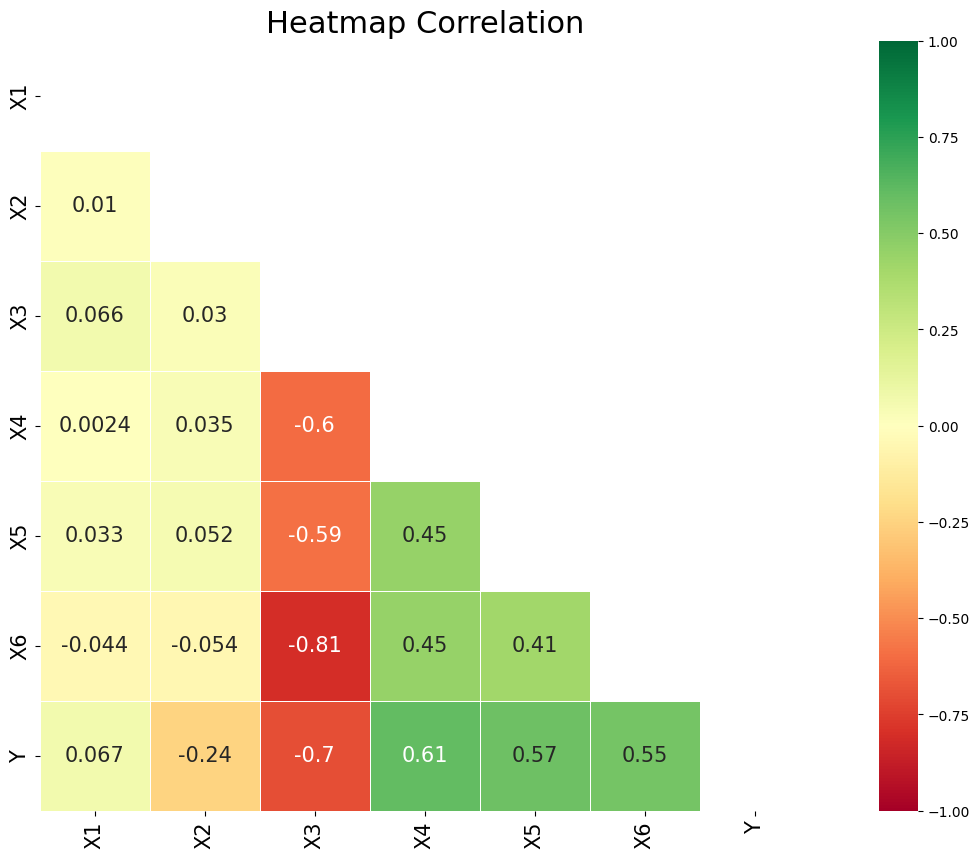

In [25]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Y memiliki hubungan positif dengan X1, X4, X5, dan X6 dan memiliki hubungan negatif dengan X3. Y tidak memiliki hubungan dengan X2.

X3 berhubungan negatif dengan Y, artinya jarak MRT berhubungan negatif dengan besarnya harga unit rumah. Artinya semakin dekat areal perumahan dengan MRT, maka semakin mahal harga rumah. Semakin jauh jarak MRT, maka semakin murah harganya

### X2 vs Y

In [26]:
import matplotlib.pyplot as plt

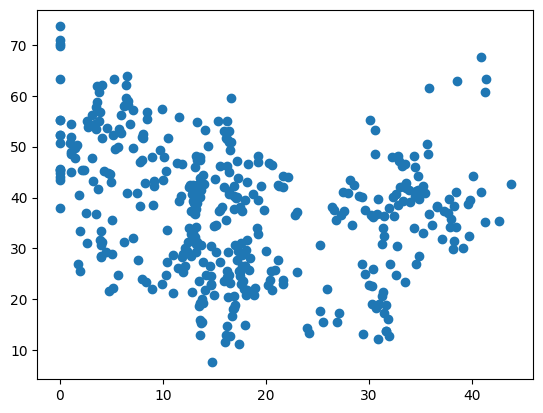

In [27]:
#House Age vs House Price Plot
plt.scatter(df['X2'],df['Y'])

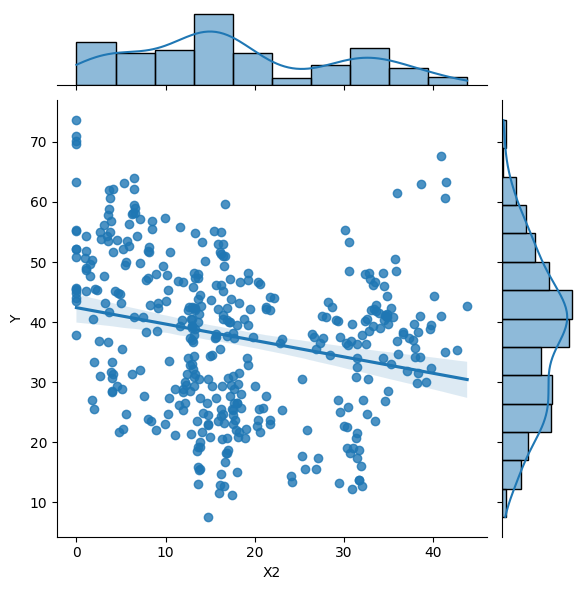

In [28]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df, kind="reg")

Key takeaway: Usia rumah tidak memiliki hubungan signifikan terhadap harga rumah

### X3 vs Y

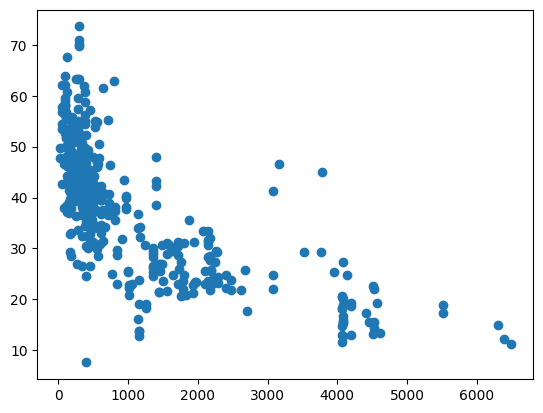

In [29]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df['X3'],df['Y'])

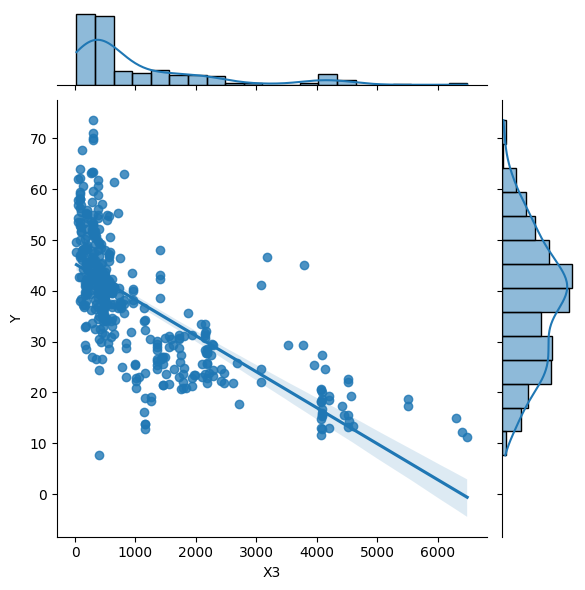

In [30]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan negatif antara jarak MRT di sekitar areal perumahan dengan harga unit rumah.Semakin dekat jarak MRT, semakin mahal harga unit rumah dan semakin jauh jarak MRT, semakin murah harga unit rumahnya.

### X4 vs Y

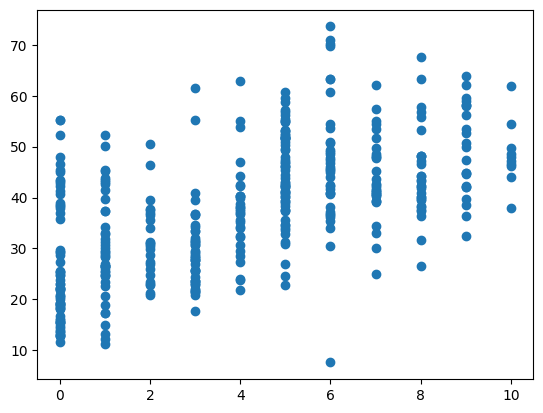

In [31]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

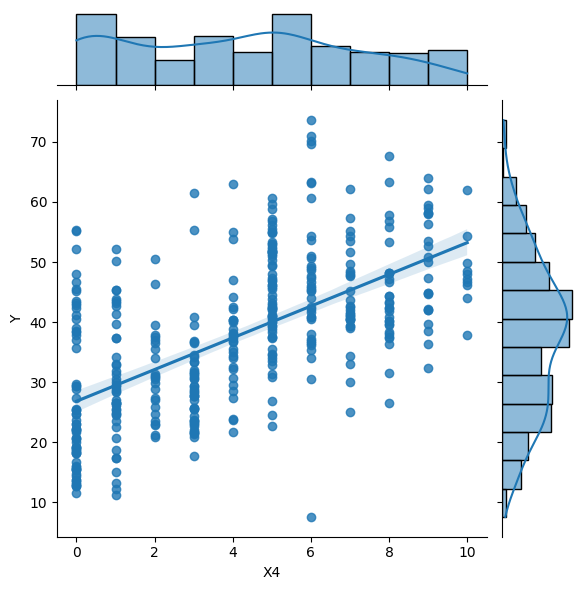

In [32]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

Key takeaway:ada hubungan positif antara banyaknya convenience store di sekitar pusat perbelanjaan dengan harga unit rumah. Artinya, semakin banyak toko perbelanjaan, semakin mahal harga unitnya, dan sebaliknya.

### X5 vs Y

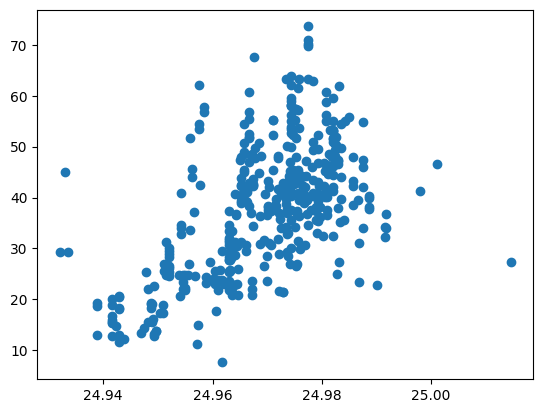

In [33]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

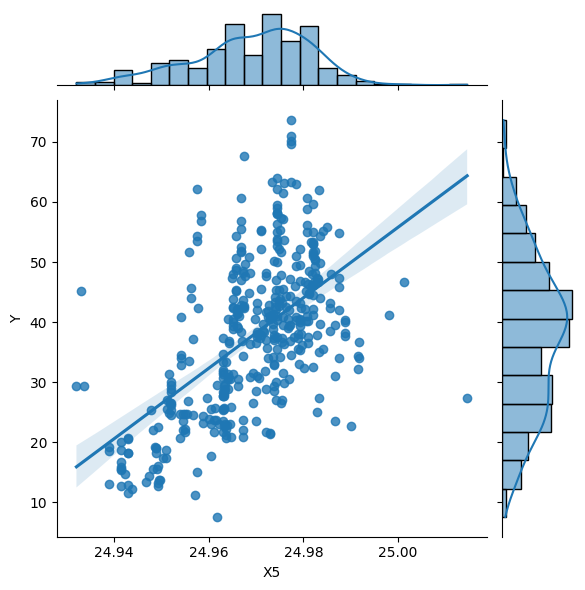

In [34]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara garis lintang (letak geografis rumah) dengan harga unit rumah.

### X6 vs Y

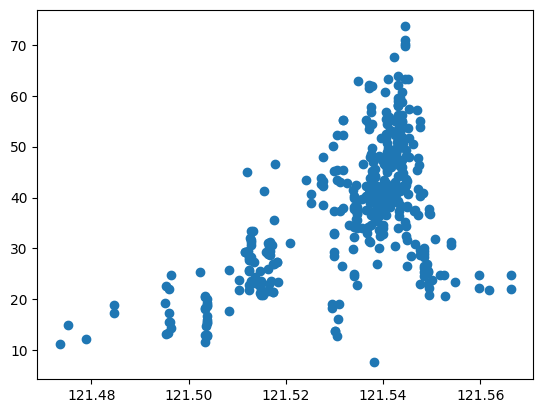

In [35]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

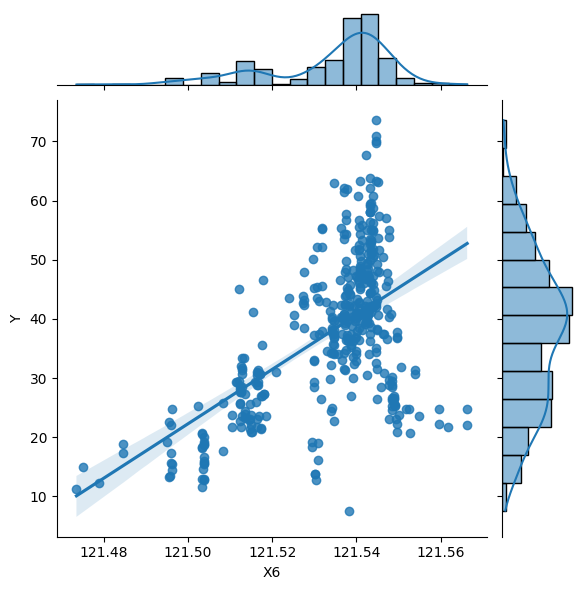

In [36]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara garis bujur (Letak geografis) dengan harga unit rumah.

Dapat disimpulkan bahwa variabel yang berhubungan dengan harga unit rumah (Y):
- X3 -> jarak dengan MRT
- X4 -> jumlah nearest convenience store
- X5 -> Longitude
- X6 -> Latitude
#### 
jadi 4 itu aja nanti yang dimasukin ke ML

## Feature Engineering:

###  Checking Multicolinearity
Satu cara untuk melihat apakah ada hubungan antar predictor (independent variable). Regresi selain harus berdistribusi normal, harus bebas dari multicolinearity.

In [37]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

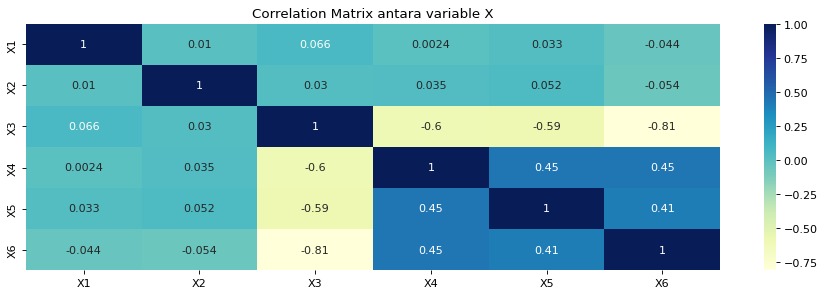

In [38]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Key takeaway: ada multicolinearity antara variabel X3 dan X6. Korelasi yang mereka miliki cukup signifikan (0.81)
##### Keputusan
Dilihat dari besarnya nilai koegisien korelasi X3 dan X6 terhadap Y
- Buang variabel yang koefisien korelasinya lebih kecil terhadap Y. Disini kita takeout X6.

Jadi variabel yang akan masuk ke model adalah:
- X3
- X4
- X5

Kalo ada multicoliearity, kita take out satu yang korelasinya tidak begitu tinggi dengan Y (target). In this case X6 kita take out.

# 3. Data Preprocessing

### Check null values

In [39]:
df.isna().sum().sort_values(ascending=False)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

Key takeaway:Tidak ada missing value dalam dataset

### Data Conversion

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      411 non-null    float64
 1   X2      411 non-null    float64
 2   X3      411 non-null    float64
 3   X4      411 non-null    int64  
 4   X5      411 non-null    float64
 5   X6      411 non-null    float64
 6   Y       411 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.6 KB


Key takeaway:Ada kesalahan tipe data, X1 harusnya tipe datetime.

In [41]:
df["X1"] = pd.to_datetime(df["X1"])

In [42]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

In [43]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,1970-01-01 00:00:00.000002012,32.0,84.87882,10,24.98298,121.54024,37.9
1,1970-01-01 00:00:00.000002012,19.5,306.59470,9,24.98034,121.53951,42.2
2,1970-01-01 00:00:00.000002013,13.3,561.98450,5,24.98746,121.54391,47.3
3,1970-01-01 00:00:00.000002013,13.3,561.98450,5,24.98746,121.54391,54.8
4,1970-01-01 00:00:00.000002012,5.0,390.56840,5,24.97937,121.54245,43.1


### Checking duplicate values

In [44]:
# Check duplicate values
df[df.duplicated(keep=False)]

,X1,X2,X3,X4,X5,X6,Y


Key takeaway: tidak ada duplicated data

# 4. Model Prediction

In [45]:
X = df.loc[:, 'X3':'X5']

In [46]:
y = pd.DataFrame(df['Y'])

In [47]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
406,4082.01500,0,24.94155
407,90.45606,9,24.97433
408,390.96960,7,24.97923
409,104.81010,5,24.96674


In [49]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
406,15.4
407,50.0
408,40.6
409,52.5


### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[ 0.02626102 -0.02282438  1.81468406]
 [ 1.54898949 -1.38398722 -1.17834838]
 [ 2.32527848 -1.38398722 -2.11508055]
 [-0.74039706 -1.04369651  0.35924552]
 [-0.48686441  0.31746633 -0.32860424]
 [-0.21504679 -1.38398722 -0.47438973]
 [-0.23219168 -0.02282438  0.77566042]
 [-0.65448945  0.99804775  0.48731122]
 [-0.78762975  2.01891988  1.01407205]
 [ 1.06887607 -0.02282438 -0.65642023]]


In [52]:
print(y_train[:10])

        Y
294  34.1
305  24.7
41   18.2
304  50.2
139  42.5
238  29.7
159  37.4
23   47.9
360  48.0
13   23.8


## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
ypred=model.predict(X_test)

In [55]:
ypred = ypred.reshape(-1,1)

In [66]:
# evaluate model
display(model.score(X_test, y_test))

0.6191822804548149

In [57]:
from sklearn.metrics import r2_score #koef determinasi, menggambarkan seberapa baik regresi menjelaskan datanya. Semakin besar koefisien determinasi, semakin bagus modelnya
from sklearn.metrics import mean_squared_error #yaktual-ypred
from sklearn.metrics import mean_absolute_error #ans (yaktual - ypred)

#### MSE

In [58]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  65.88
MAE :  6.3
RMSE :  8.12


#### R-Square

In [59]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr 

0.62

model regresi hanya mampu menjelaskan 55 persen keragaman datanya sisanya 45% dapat dijuelaskan oleh variabel lain diluar. Model regresi cukup baik saat lr>75%

Model regresi ini hanya mampu menjelaskan 52% keragaman datanya. 
Model regresi cukup baik jika r2 > 75%.

## Random Forest Regression

In [68]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

C:\Users\user\AppData\Local\Temp\ipykernel_3716\2527848431.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.7156824813272102

MSE :  49.183941042331575
MAE :  5.309229580582352
RMSE :  7.0131263386831675


In [69]:
r3_fr = r2_score(y_test,ypred).round(2)
r3_fr 

0.72

## Support Vector Regression (SVR)

In [61]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [88]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6339392861178776

MSE :  63.32465425815911
MAE :  5.9900984794024295
RMSE :  7.9576789491760165


In [71]:
r4_cvr = r2_score(y_test,ypred).round(2)
r4_cvr

0.63

# K-Means

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(X_train)

KMeans(max_iter=100, n_clusters=2)

In [72]:
# evaluate model
display(kmeans.score(X_test, y_test))

# use model to predict
ypred = kmeans.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

-110.49824209112431

MSE :  1623.6408433734937
MAE :  37.96265060240963
RMSE :  40.294426951794385


In [73]:
r4_kmean = r2_score(y_test,ypred).round(2)
r4_kmean

-8.39

## Model Comparison

Model SVR > Regression > Random forest (Sebelum outlier dibuang)

Model SVR lebih baik (besar) daripada regresi linear dan random forest

Model Random Forest > SVR > Regression > Kmeans (setelah outlier dibuang)
- Model Random Forest lebih baik daripada Regresi Linear, SVR, dan Kmeans

# 5. Conclusion

Sebelum outlier dibuang, Model yang terbaik adalah hasil model dari SVR karena memiliki akurasi model (r_square) 0.64 lebih tinggi dari model lainnya. Tingkat error modelnya juga yang paling rendah diantara model lainnya. Artinya, model mampu memprediksi harga unit rumah dengan baik.
##### 
Setelah outlier dibuang, model yang terbaik adalah hasil model dari random forest karena memiliki akurasi model (r_square) 0,73, lebih tinggi dari model lainnya. Tingkat erornya juga paling rendah diantara model lainnya, artinya model ini dapat memprediksi harga rumah dengan baik.

In [79]:
#buat prediksi
print(model3.predict([[85,10,25]]), '<- Harga rumah')

[32.63420807] <- Harga rumah


In [83]:
#buat prediksi
print(model2.predict([[85,10,25]]), '<- Harga rumah')

[26.91877443] <- Harga rumah


In [84]:
#buat prediksi
print(model.predict([[85,10,25]]), '<- Harga rumah')

[[-310.63293309]] <- Harga rumah


In [111]:
#buat prediksi
print(kmeans.predict([[85,10,25]]), '<- Harga rumah')

[1] <- Harga rumah
